## Criando uma nuvem de dados com um texto:

In [85]:
# ler arquivo
with open('new2.txt', encoding='utf8') as file:
    text = " ".join(s for s in file)


### Quebra de palavras e exclusão das palavras comuns:

In [90]:
# biblioteca
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# separando o texto em palavras
text_tokens = word_tokenize(text)

# adicao de exclusao de potuacao
stopwords = stopwords.words("portuguese") +["!", ",", "?", ".",":",";"]+["jogo","of","algo","muita","ser","espere","claro","em","alguns","pouco","parte"]

# remover palavras irrelevantes
tokens_without_sw = [word for word in text_tokens if not word in stopwords]



### Geração da imagem com as palavras usando a mascara da bandeira do japão como fundo:

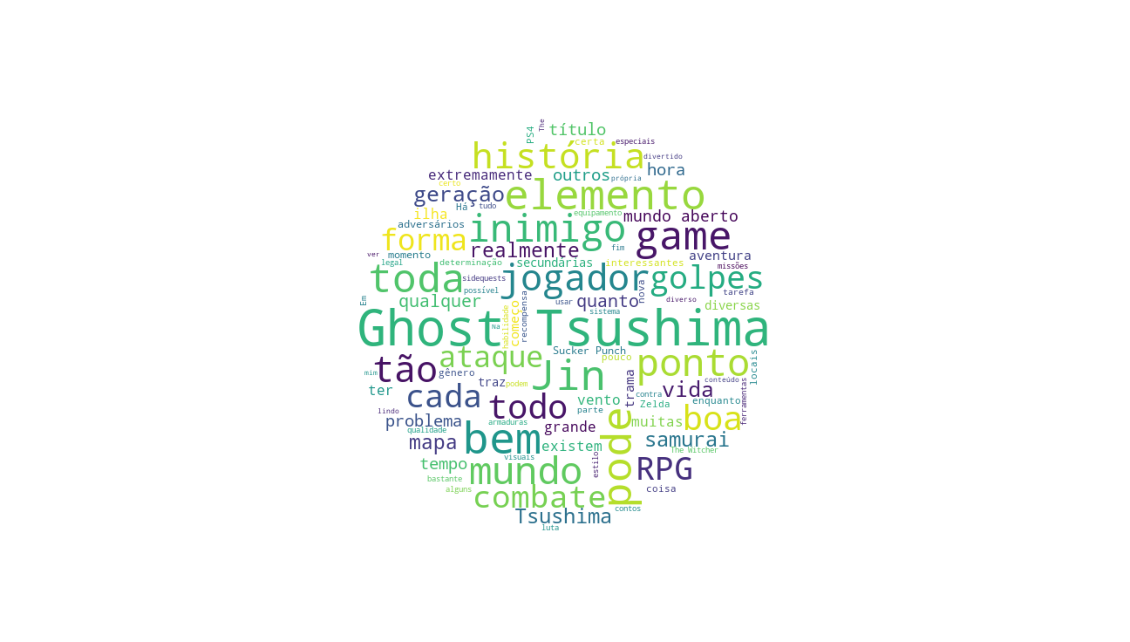

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# paralavras irrelevantes
stopwords = set(stopwords)

all_summary = " ".join(s for s in tokens_without_sw)

# adicionando marcara
ghost_of_tsushima = np.array(Image.open("japan.jpg"))

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1000, height=1000, max_words=100,
                      mask=ghost_of_tsushima, max_font_size=200,
                      min_font_size=1).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(20,12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);
wordcloud.to_file("image.png")